In [22]:
import pandas as pd

In [23]:
import pandas as pd

# Load the dataset
clustered_data = pd.read_csv('../files/clustered_BankChurners.csv')

# Drop the specified columns
cleaned_clustered_data = clustered_data.drop(clustered_data.columns[[0, 21, 22]], axis=1)

# Original unique values for object columns
original_unique_values = {
    'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
    'Gender': ['M', 'F'],
    'Education_Level': ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate'],
    'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
    'Income_Category': ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown'],
    'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']
}

# Encoding dictionaries
encoding_dicts = {
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Gender': {'M': 1, 'F': 0},
    'Education_Level': {'High School': 1, 'Graduate': 3, 'Uneducated': 0, 'Unknown': -1, 'College': 2, 'Post-Graduate': 4, 'Doctorate': 5},
    'Marital_Status': {'Married': 1, 'Single': 0, 'Unknown': -1, 'Divorced': 0},
    'Income_Category': {'$60K - $80K': 2, 'Less than $40K': 0, '$80K - $120K': 3, '$40K - $60K': 1, '$120K +': 4, 'Unknown': -1},
    'Card_Category': {'Blue': 0, 'Gold': 1, 'Silver': 1, 'Platinum': 1}
}

def label_encode_columns(data, encoding_dicts):
    encoded_data = data.copy()
    for column, encoder_dict in encoding_dicts.items():
        encoded_data[column] = encoded_data[column].map(encoder_dict)
    return encoded_data

# Apply label encoding
encoded_clustered_data = label_encode_columns(cleaned_clustered_data, encoding_dicts)

# Verify the changes
encoded_clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<Figure size 1000x600 with 0 Axes>

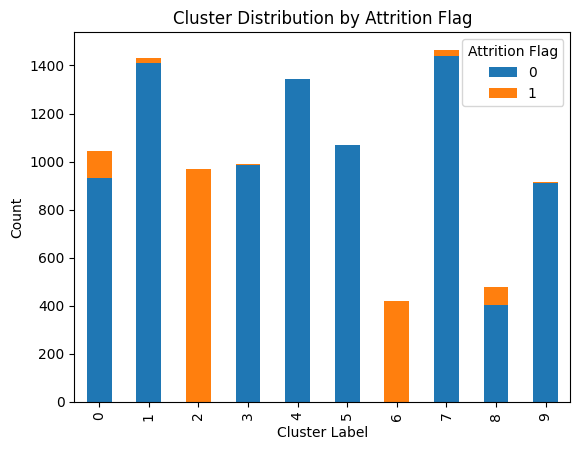

In [25]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))

# Group by 'Cluster_Label' and 'Attrition_Flag' and count occurrences
grouped_data = encoded_clustered_data.groupby(['Cluster_Label', 'Attrition_Flag']).size().unstack()

# Plot the bars
grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Cluster Distribution by Attrition Flag')
plt.xlabel('Cluster Label')
plt.ylabel('Count')

# Add legend
plt.legend(title='Attrition Flag')

# Show the plot
plt.show()

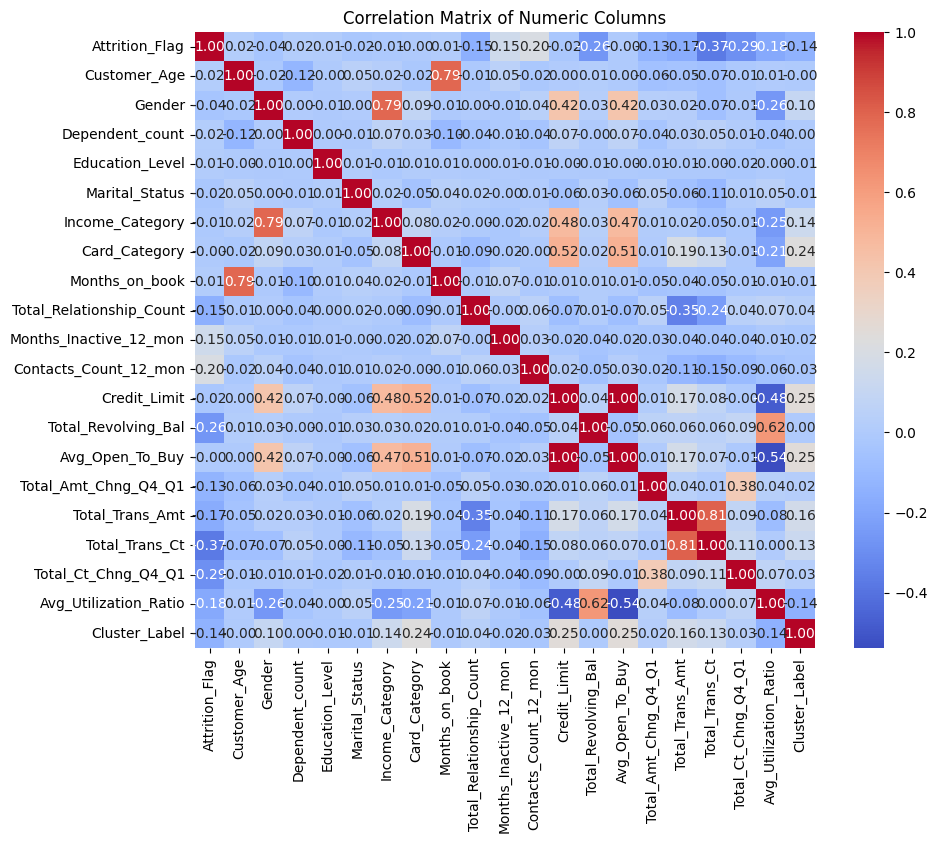

In [26]:
# Select numeric columns
numeric_columns = encoded_clustered_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = encoded_clustered_data[numeric_columns].corr()

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


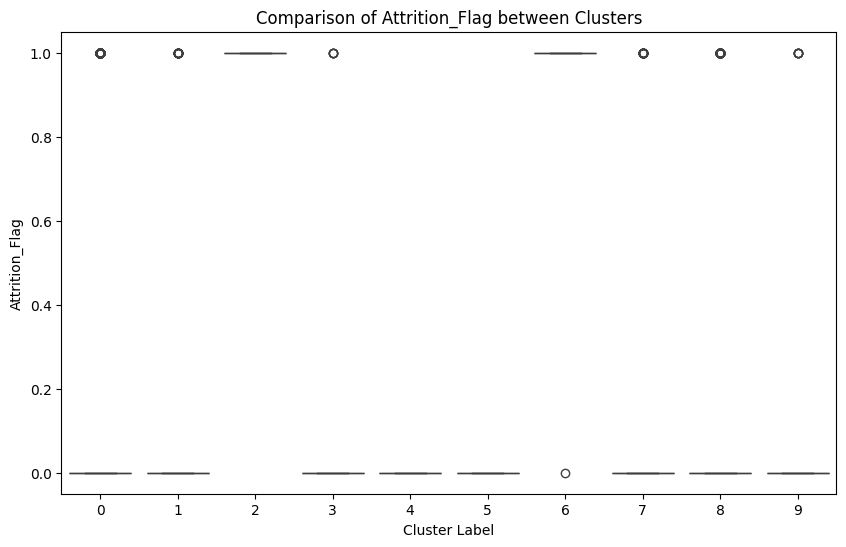

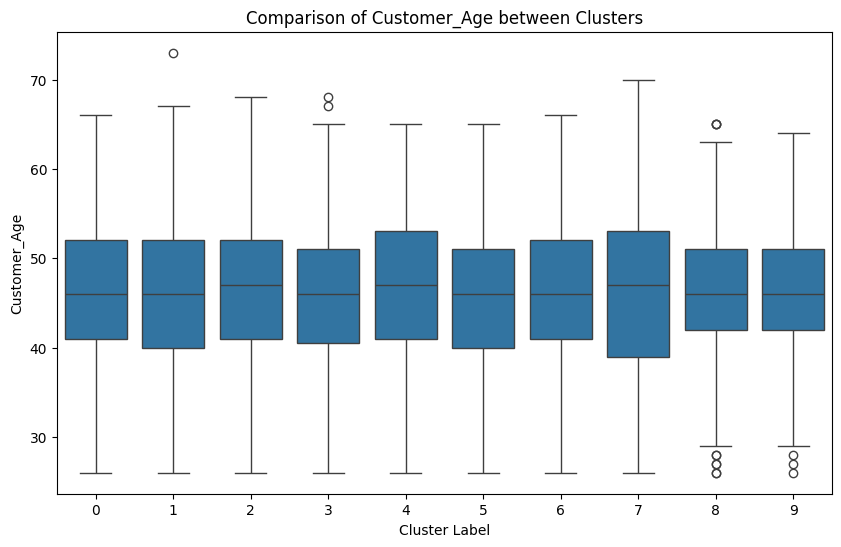

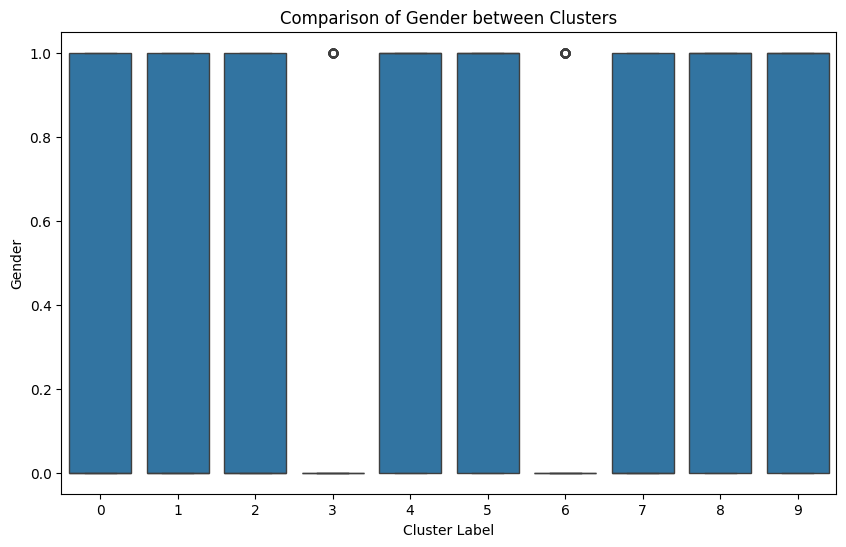

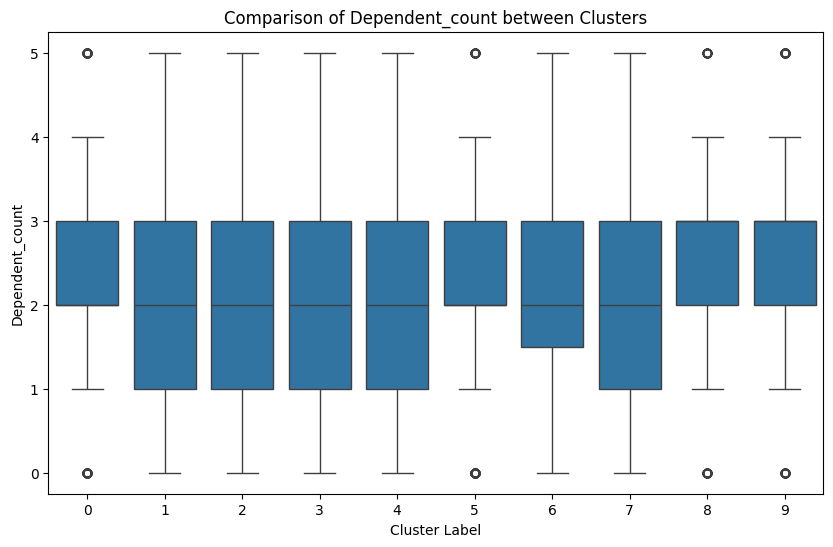

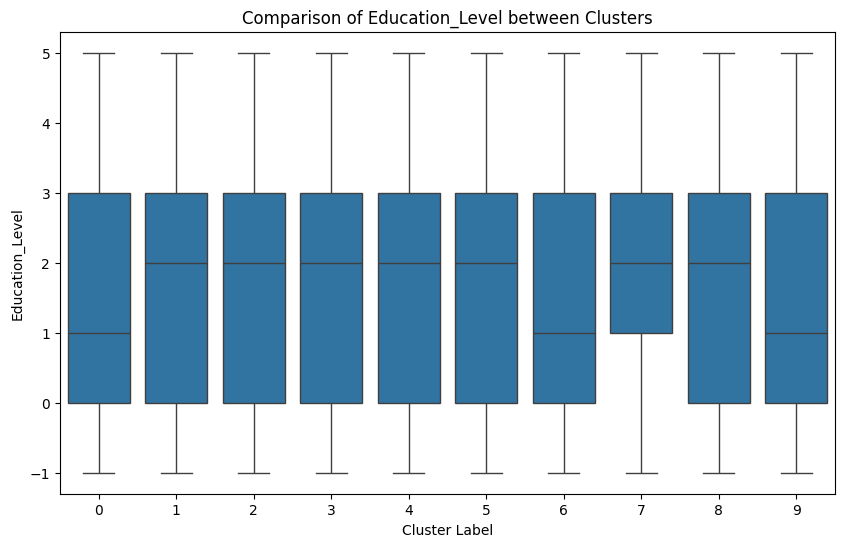

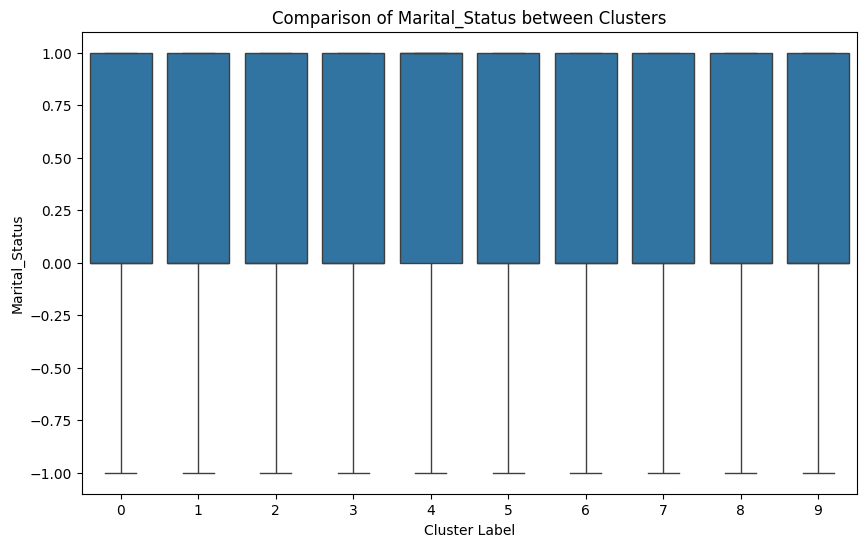

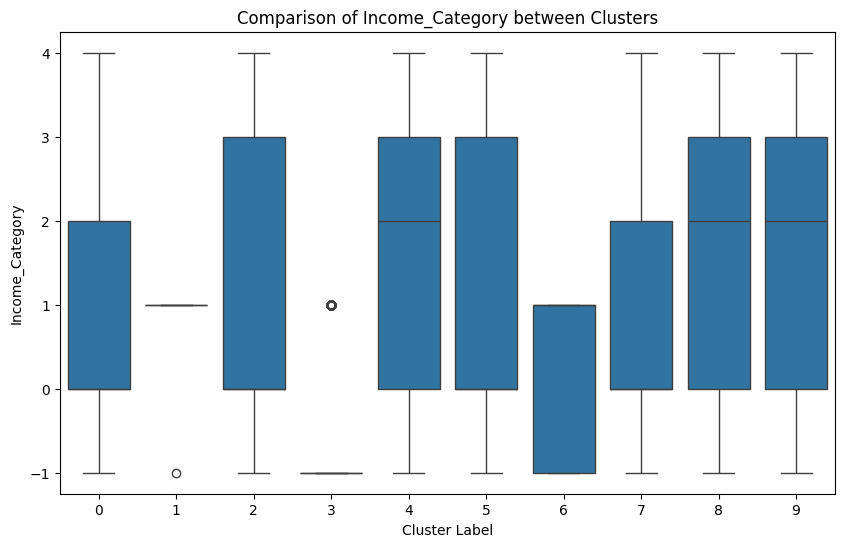

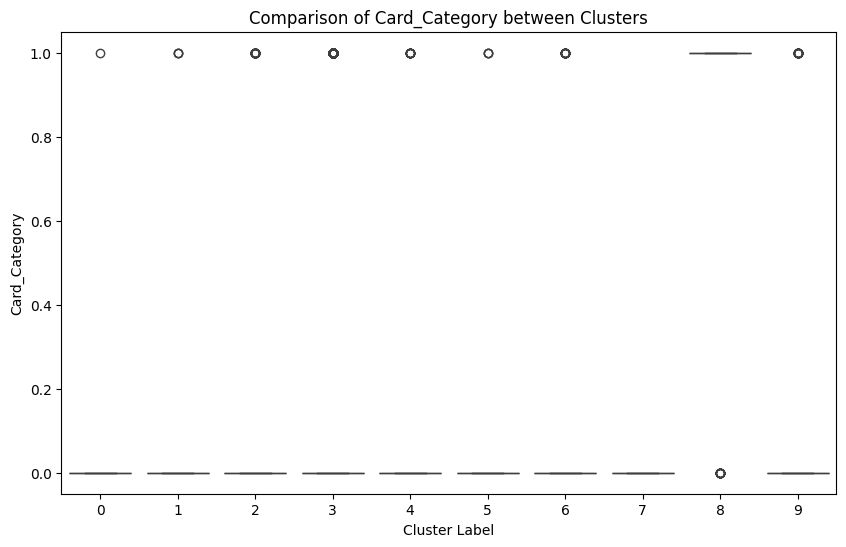

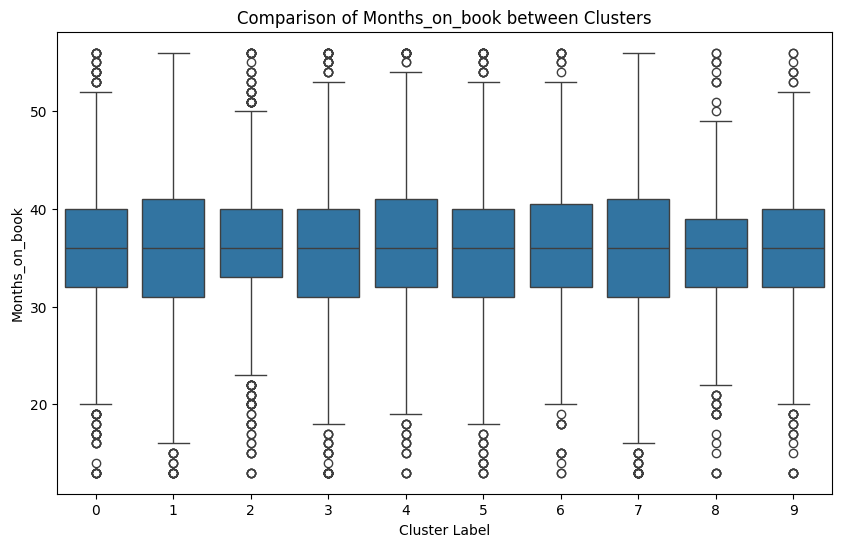

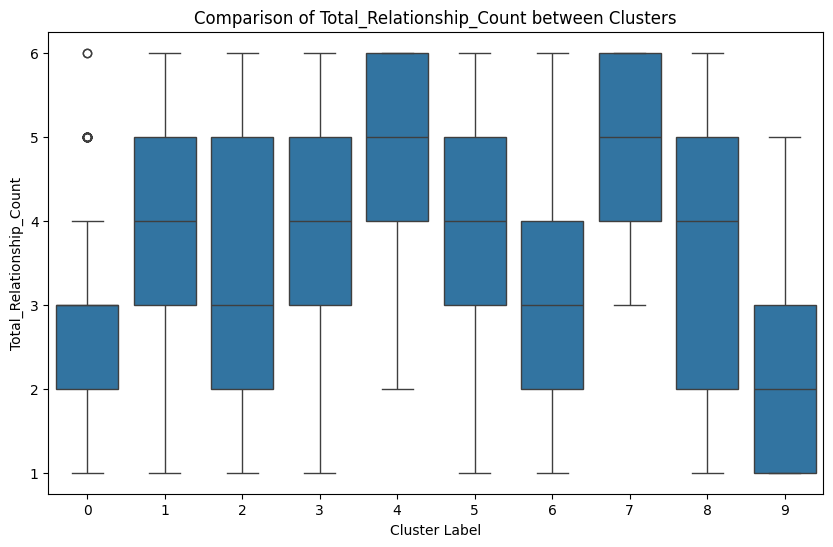

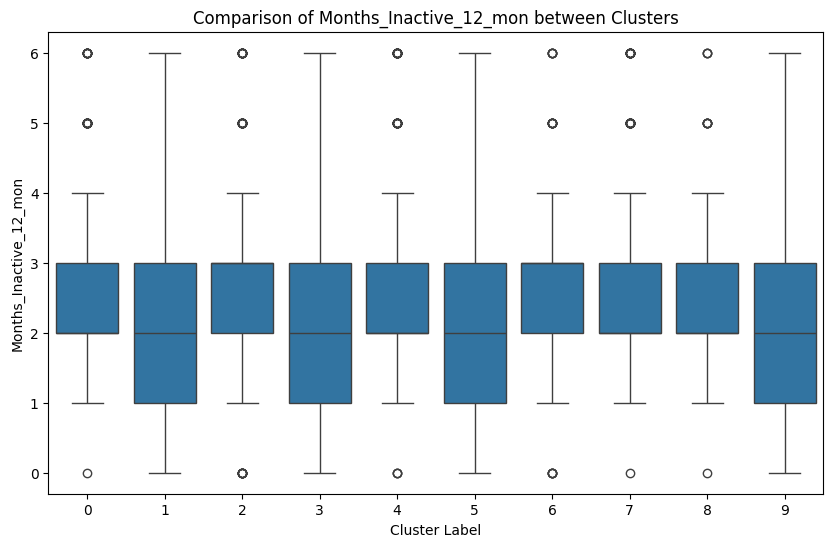

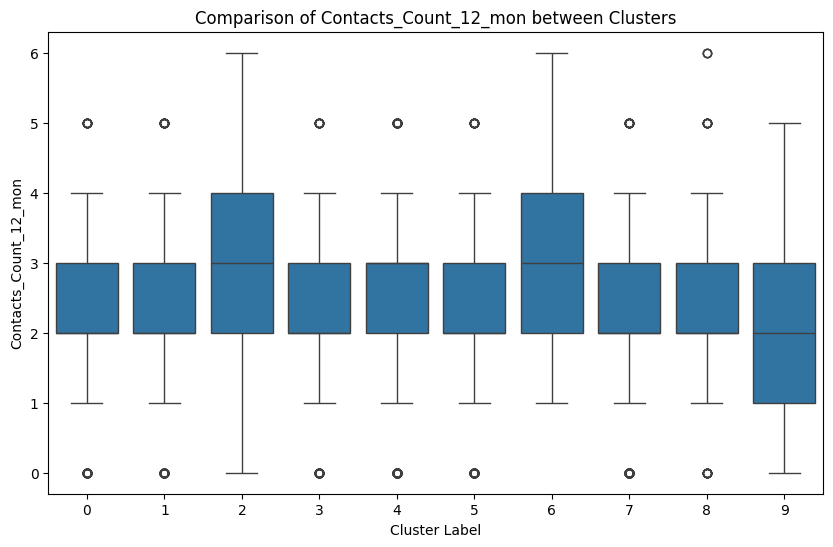

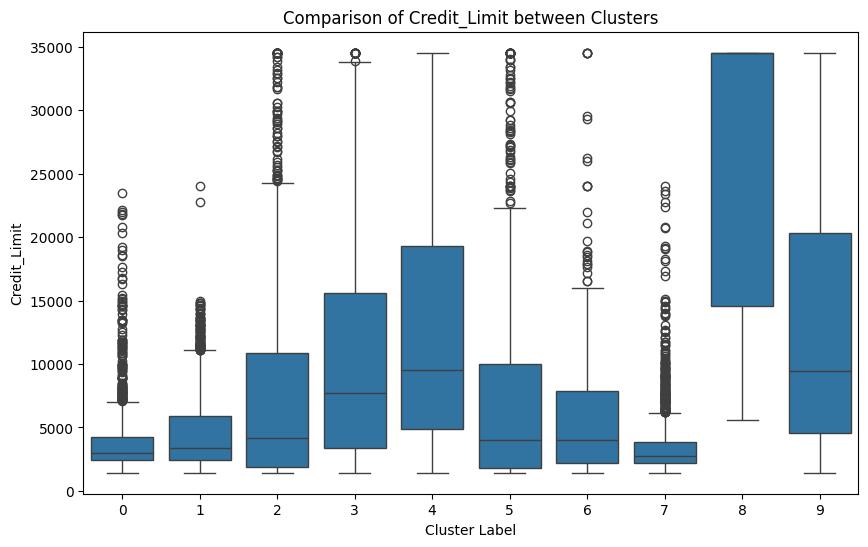

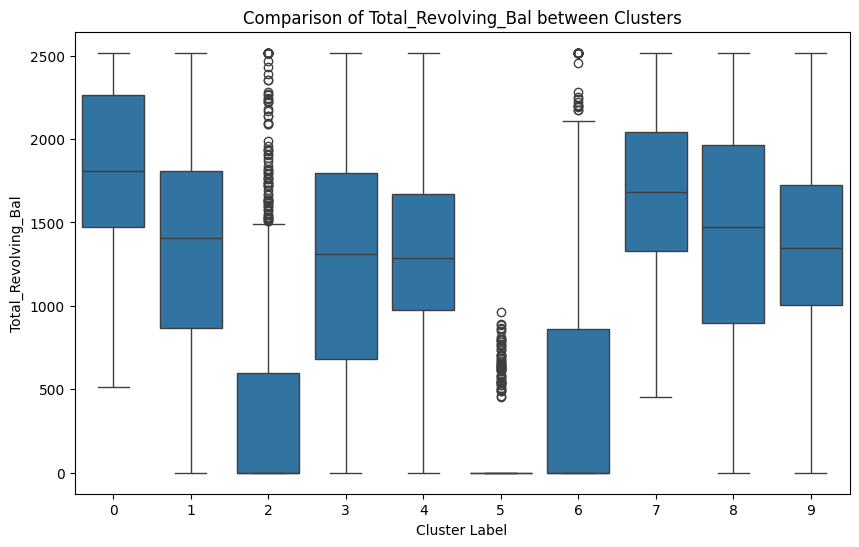

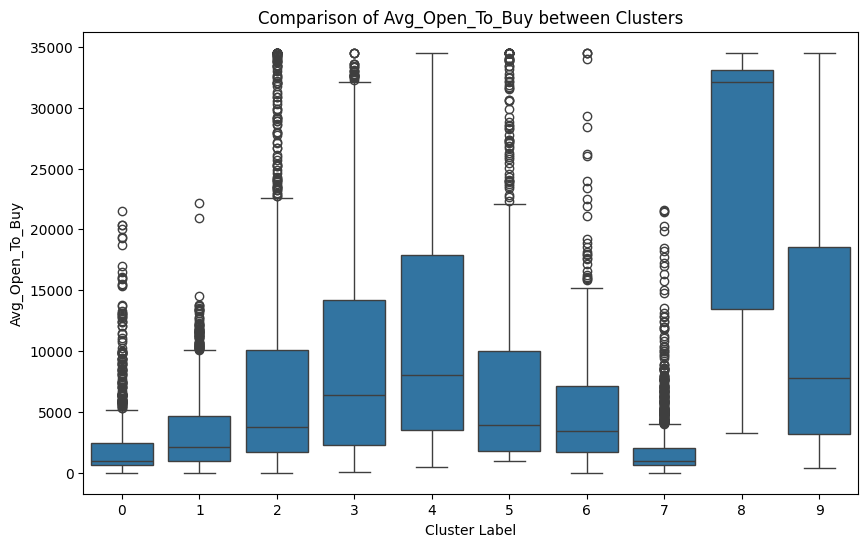

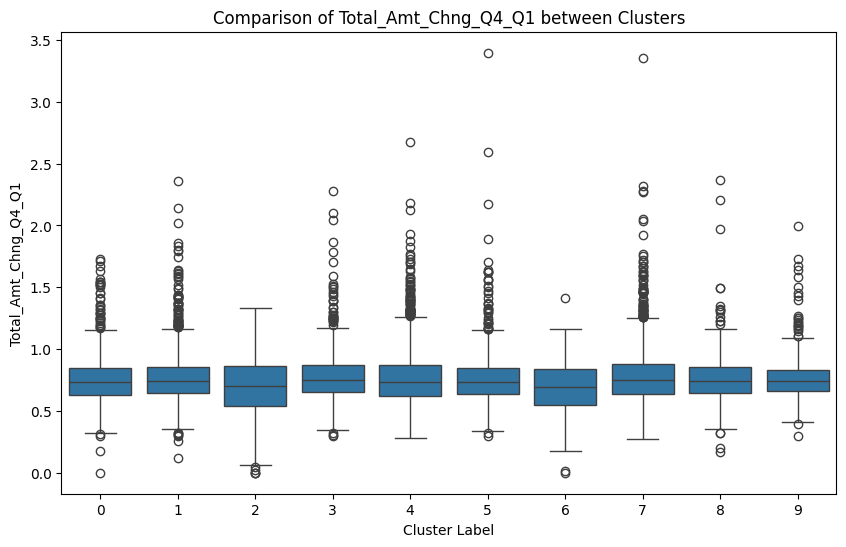

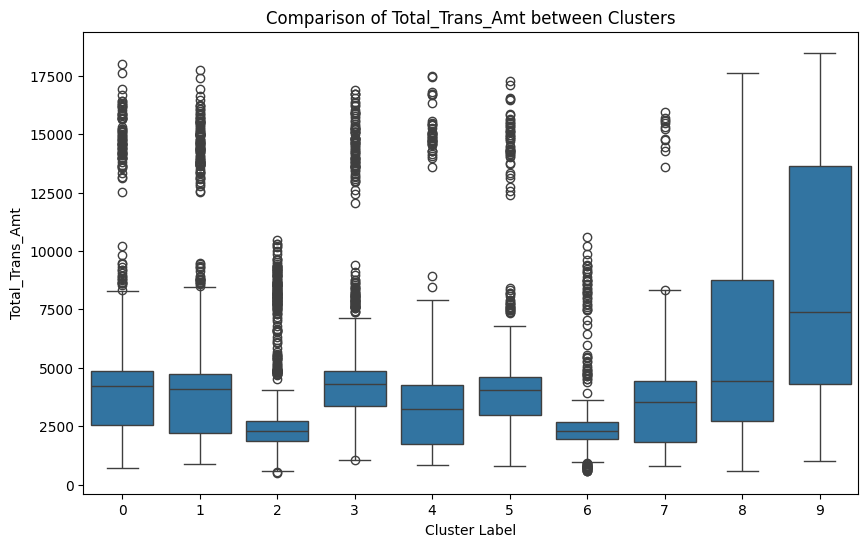

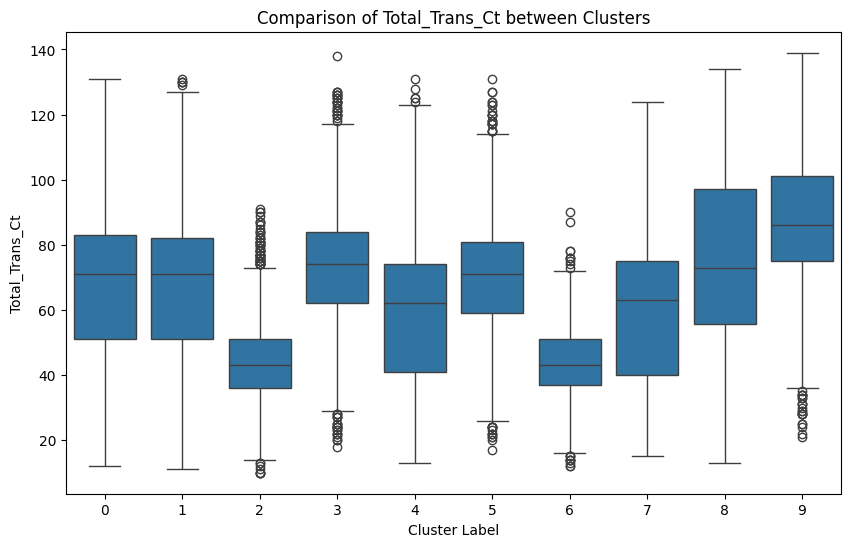

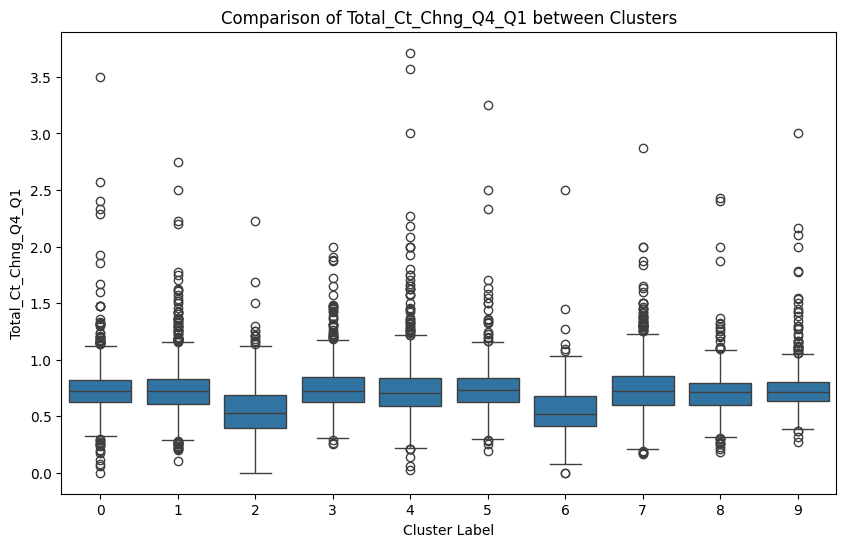

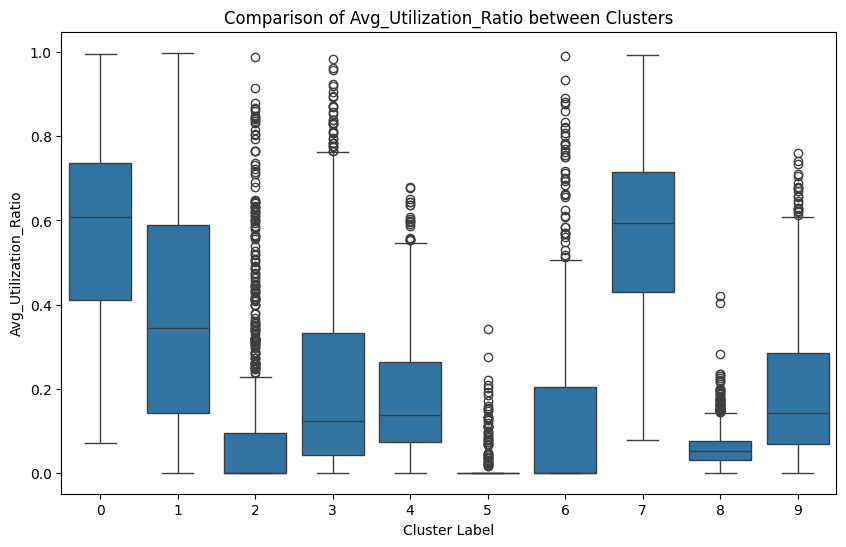

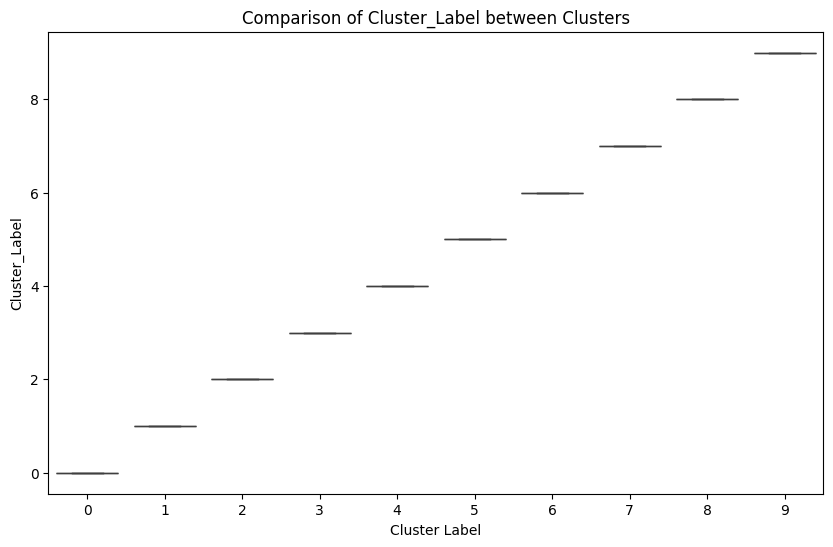

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = encoded_clustered_data.select_dtypes(include=['int64', 'float64']).columns

# Iterate over numeric columns and create box plots for each cluster
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_Label', y=column, data=encoded_clustered_data)
    plt.title(f'Comparison of {column} between Clusters')
    plt.xlabel('Cluster Label')
    plt.ylabel(column)
    plt.show()
